In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Vemos las columnas, sus nombres y datos que contienen

In [ ]:
victimas_df = pd.read_excel(('../datasets/homicidios.xlsx'), sheet_name='VICTIMAS')
victimas_df.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [8]:
homicidiosbsas = pd.read_excel('../datasets/homicidios.xlsx')

homicidiosbsas.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


### Vemos con el tipo de dato que se encuentra cada columna

In [ ]:
homicidiosbsas.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

In [ ]:
victimas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [ ]:
# Convertir columnas de tiempo a formato datetime
homicidiosbsas['HORA'] = pd.to_datetime(homicidiosbsas['HORA'], errors='coerce')
homicidiosbsas['HH'] = pd.to_datetime(homicidiosbsas['HH'], errors='coerce')

# Convertir columnas de coordenadas a tipos numéricos
homicidiosbsas['XY (CABA)'] = pd.to_numeric(homicidiosbsas['XY (CABA)'], errors='coerce')
homicidiosbsas['pos x'] = pd.to_numeric(homicidiosbsas['pos x'], errors='coerce')
homicidiosbsas['pos y'] = pd.to_numeric(homicidiosbsas['pos y'], errors='coerce')


In [ ]:
victimas_df['EDAD'] = pd.to_numeric(victimas_df['EDAD'], errors='coerce')

Se identificó una necesidad imperante durante el proceso: la modificación de los tipos de datos asociados a ciertas columnas, dado que estos no se alineaban correctamente con los requisitos de la información contenida. Esta acción se perfila como esencial para prevenir posibles errores futuros y para optimizar el aprovechamiento preciso de los datos, estableciendo así una base sólida y confiable para las futuras etapas del análisis y la toma de decisiones.

### **Nulos**

Vemos los nulos en cada columna

In [ ]:
print("\nValores nulos:")
print(homicidiosbsas.isnull().sum())


Valores nulos:
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                     609
HH                         1
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                696
pos x                     12
pos y                     12
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


In [10]:
from geopy.geocoders import Nominatim

# Crear un objeto geolocalizador
geolocator = Nominatim(user_agent="mi_aplicacion")

# Función para obtener la dirección a partir de coordenadas
def obtener_direccion(latitud, longitud):
    try:
        location = geolocator.reverse((latitud, longitud), language='es')
        return location.address
    except:
        return None

# Aplicar la función a las filas con valores nulos en "Altura" o "Cruce"
filas_nulas = homicidiosbsas[homicidiosbsas['Altura'].isnull() | homicidiosbsas['Cruce'].isnull()]

for index, row in filas_nulas.iterrows():
    if pd.isnull(row['Altura']):
        latitud = row['pos y']
        longitud = row['pos x']
        direccion = obtener_direccion(latitud, longitud)
        homicidiosbsas.at[index, 'Altura'] = direccion

    if pd.isnull(row['Cruce']):
        latitud = row['pos y']
        longitud = row['pos x']
        direccion = obtener_direccion(latitud, longitud)
        homicidiosbsas.at[index, 'Cruce'] = direccion


Se detectó que las columnas con mayor presencia de valores nulos están asociadas a aspectos geográficos. Como solución, implementamos un procedimiento para completar dichos valores nulos mediante un código que asigna las coordenadas geográficas exactas correspondientes a cada fila.

In [11]:
print("\nValores nulos:")
print(homicidiosbsas.isnull().sum())


Valores nulos:
ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
DD                        0
HORA                      0
HH                        0
LUGAR_DEL_HECHO           0
TIPO_DE_CALLE             0
Calle                     1
Altura                   12
Cruce                    12
Dirección Normalizada     8
COMUNA                    0
XY (CABA)                 0
pos x                     0
pos y                     0
PARTICIPANTES             0
VICTIMA                   0
ACUSADO                   0
dtype: int64


Podemos corroborar que efectivamente los datos se rellenaron

In [12]:
homicidiosbsas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 684 non-null    object        
 12  Cruce                  684 non-null    object        
 13  Direc

Eliminamos columna XY(CABA) por redundancia con las columnas pos x y pos y

In [ ]:
# Eliminar la columna 'XY (CABA)'
homicidiosbsas.drop('XY (CABA)', axis=1, inplace=True)

#### Normalización de datos
* Se corrigio la hora para que se muestre de forma adecuada
* Las columnas que se encontraban con datos ? se los reemplazo por NaN o No especificado para un mejor análisis y buen uso de los datos en el futuro

In [13]:
# Verificar y transformar el formato de la columna 'HORA' en homicidiosbsas
homicidiosbsas['HORA'] = homicidiosbsas['HORA'].apply(lambda x: x[:2] + ':' + x[2:] if len(str(x)) == 4 else x)

# Especificar las columnas en las que deseas reemplazar los '?' por NaN
columnas_especificas_nan = ['HORA', 'Altura', 'Cruce']

# Reemplazar los '?' por NaN solo en las columnas especificadas
homicidiosbsas[columnas_especificas_nan] = homicidiosbsas[columnas_especificas_nan].replace('?', np.nan)

# Reemplazar los '?' por 'No especificado' solo en las columnas especificadas
columnas_especificas_no_especificado = ['LUGAR_DEL_HECHO', 'TIPO_DE_CALLE']
homicidiosbsas[columnas_especificas_no_especificado] = homicidiosbsas[columnas_especificas_no_especificado].replace('?', 'No especificado')


### **Analisis en función del tiempo**

#### Distribución por año de fatalidades

Text(0.5, 1.0, 'Distribución por Año')

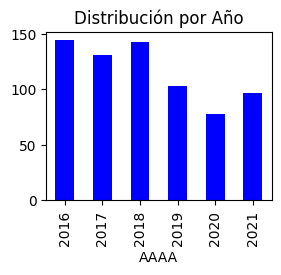

In [ ]:
plt.subplot(2, 2, 1)
homicidiosbsas['AAAA'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribución por Año')

Al analizar el gráfico que representa la cantidad de muertes a lo largo de los años, se destaca de manera evidente un marcado descenso en el número de homicidios, especialmente cerca del año 2020. Este fenómeno puede ser directamente atribuido a la pandemia global y la consiguiente reducción significativa de la presencia de conductores en las calles.

#### Distribución por mes de fatalidades

Text(0.5, 1.0, 'Distribución por Mes')

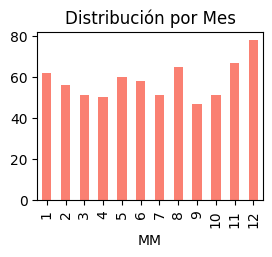

In [ ]:
plt.subplot(2, 2, 2)
homicidiosbsas['MM'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribución por Mes')

Al examinar la distribución mensual de muertes, se evidencia que los meses asociados a las vacaciones en Argentina se destacan por concentrar un mayor número de incidentes. Este patrón sugiere una correlación entre los periodos vacacionales y un aumento en la frecuencia de accidentes.

#### Distribución por hora de fatalidades

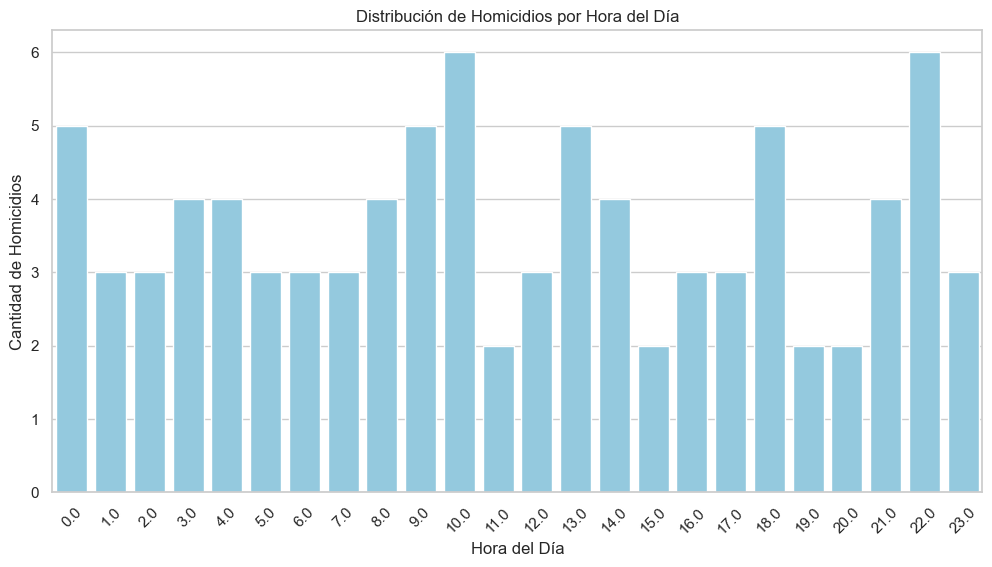

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras más ancho
plt.figure(figsize=(12, 6))

# Agrupar por hora y contar la cantidad de registros
hora_counts = homicidiosbsas['HORA'].dt.hour.value_counts().sort_index()

# Crear el gráfico de barras
sns.barplot(x=hora_counts.index, y=hora_counts.values, color='skyblue')

# Personalizar el gráfico
plt.title('Distribución de Homicidios por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()


En el gráfico que representa la relación entre las horas y la cantidad de muertes, se destaca un patrón interesante.
* Las horas con mayor incidencia de muertes son las 10hs y 22hs. Esto podría indicar que estos momentos coinciden con las horas pico, en las cuales las personas suelen usar más sus vehiculos o experimentar una mayor prisa debido a compromisos laborales o personales.
* Por otro lado, es importante notar que las horas con menos incidentes se presentan a las 11, 15, 19 y 20. Esto es algo esperable y abrupto, ya que a esas horas se registra una disminución en el tráfico, lo que naturalmente reduce el riesgo de muertes.

#### Promedio de fatalidades por hora

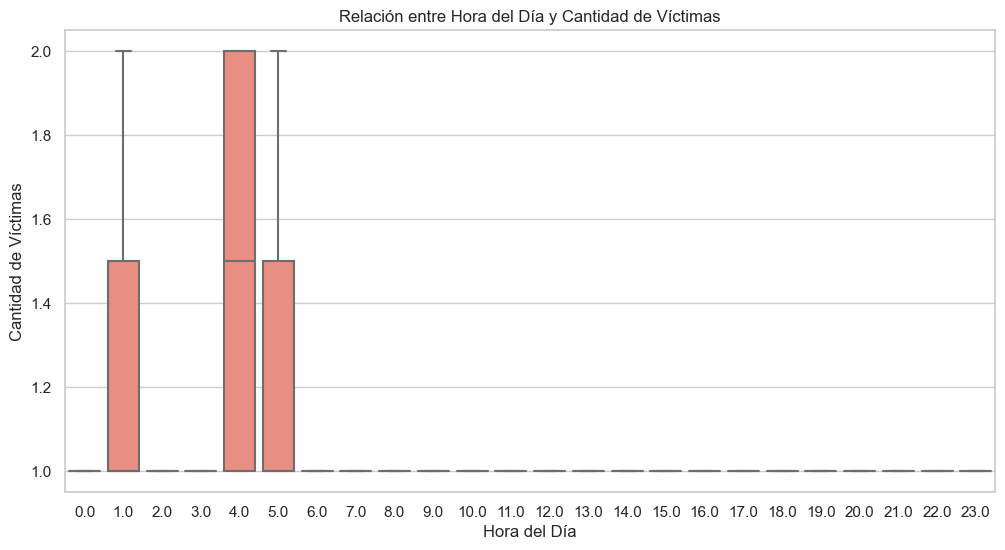

In [ ]:
# Analizar la relación con la hora del día
plt.figure(figsize=(12, 6))
sns.boxplot(x=homicidiosbsas['HORA'].dt.hour, y=homicidiosbsas['N_VICTIMAS'], color='salmon')
plt.title('Relación entre Hora del Día y Cantidad de Víctimas')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Víctimas')
plt.show()

Se evidencia que la cantidad promedio de fatalidades viales a lo largo del día es de una persona. Sin embargo, se observa un aumento significativo en las horas de la madrugada, especialmente a la 1 AM, 4 AM y 5 AM. Este fenómeno podría asociarse a las salidas de eventos festivos, dado que estas horas coinciden con el inicio y fin de ciertos eventos muy concurridos. Es plausible que en esos momentos haya una mayor presencia de personas que han consumido alcohol, lo que podría contribuir a la elevación de los índices de accidentes viales en esas franjas horarias.

#### **Conclusiones**
* La disminución abrupta en la cantidad de muertes refleja de manera palpable el impacto directo de eventos extraordinarios, como la crisis sanitaria, en la dinámica del tráfico y la seguridad vial.
* Hay que tener en cuenta los patrones de movilidad, incremento de desplazamientos turísticos, y variaciones en la densidad del tráfico durante los períodos vacacionales. 
* La importancia de considerar factores estacionales y eventos específicos al abordar estrategias y políticas de seguridad vial.
* Estas observaciones resaltan la importancia de considerar los factores de tiempo, así como sus patrones, en la gestión de la seguridad y la prevención de accidentes vehiculares.

### **Cantidad de victimas por accidente**

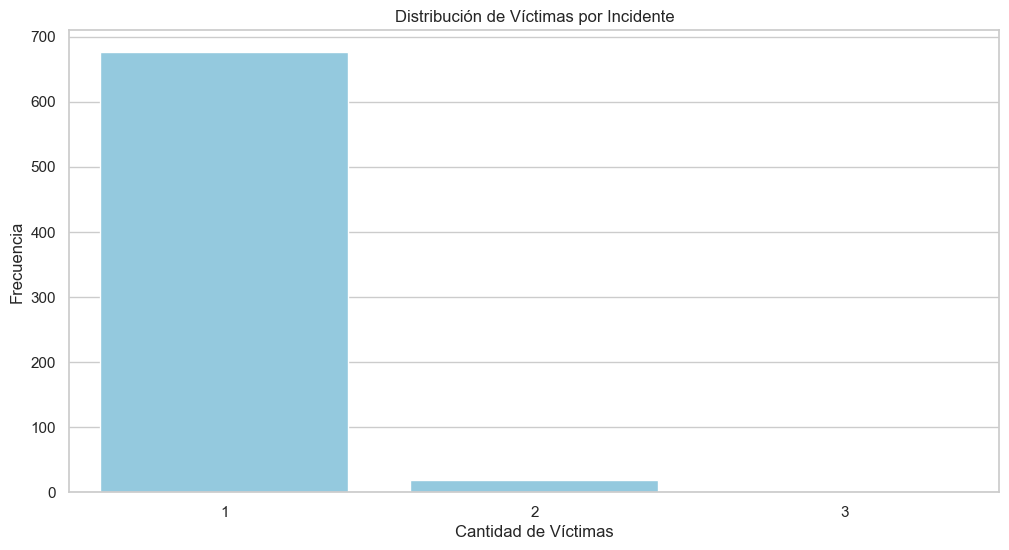

In [ ]:
# Crear un gráfico de barras para la distribución de víctimas por incidente
plt.figure(figsize=(12, 6))
sns.countplot(x=homicidiosbsas['N_VICTIMAS'], color='skyblue')
plt.title('Distribución de Víctimas por Incidente')
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Frecuencia')
plt.show()


La mayoría significativa de los accidentes registrados presenta un único fallecimiento, lo que sugiere una tendencia hacia la ocurrencia de incidentes cuando una sola persona se encuentra en el vehículo. Este patrón podría indicar que los accidentes tienden a ocurrir con mayor frecuencia cuando un solo individuo está involucrado en la situación.

### **Cantidad de accidentes por comuna**

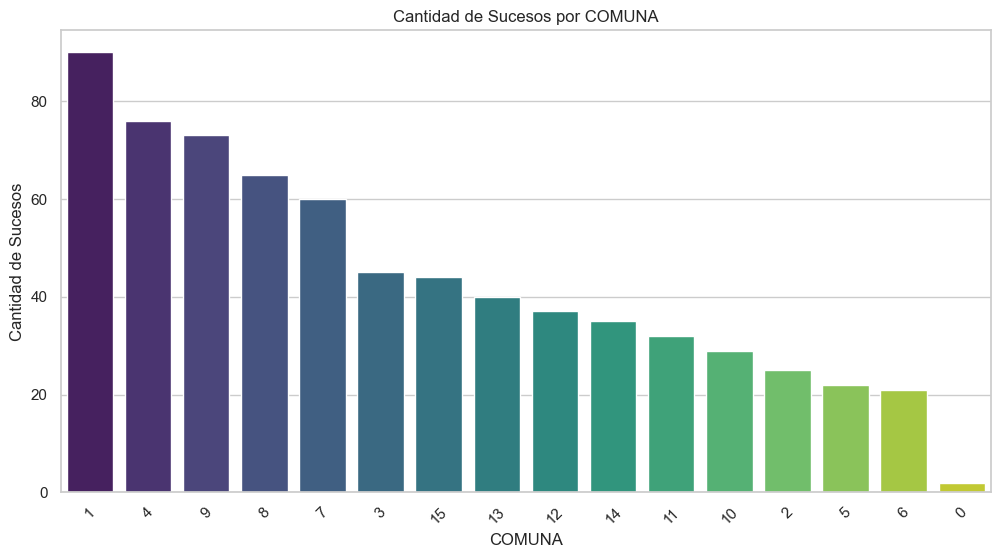

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras para la cantidad de sucesos por COMUNA
plt.figure(figsize=(12, 6))
sns.countplot(x='COMUNA', data=homicidiosbsas, order=homicidiosbsas['COMUNA'].value_counts().index, palette='viridis')
plt.title('Cantidad de Sucesos por COMUNA')
plt.xlabel('COMUNA')
plt.ylabel('Cantidad de Sucesos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


En el gráfico se observa que la comuna con la mayor incidencia de accidentes es la número uno, la cual corresponde a Puerto Madero. Esta comuna se destaca como la más transitada de toda la Ciudad Autónoma de Buenos Aires (CABA), ya que alberga puntos clave como el Obelisco, la Plaza de Mayo y otros lugares emblemáticos y muy visitados. La concentración de actividad en esta área puede explicar la mayor frecuencia de accidentes registrados, dada la afluencia significativa de tráfico y peatones en esta zona estratégica de la ciudad.

### **Muertes en función del sexo**

#### Victimas por sexo

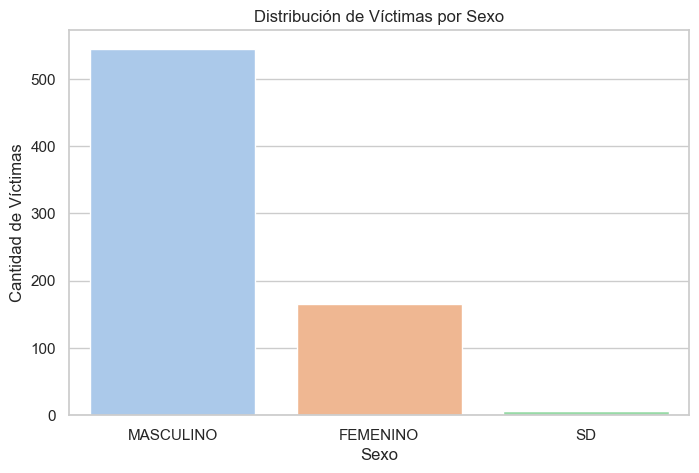

In [ ]:
# Análisis por sexo: Distribución de víctimas por sexo
plt.figure(figsize=(8, 5))
sns.countplot(x='SEXO', data=victimas_df, palette='pastel')
plt.title('Distribución de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Víctimas')
plt.show()

En la comparación de las estadísticas de fallecimientos por género, se destaca que el sexo masculino exhibe una mayor incidencia en términos de cantidad de muertes. Este fenómeno puede asociarse a la frecuencia con la que los hombres asumen roles de conductores en comparación con las mujeres.

#### Edades por sexo

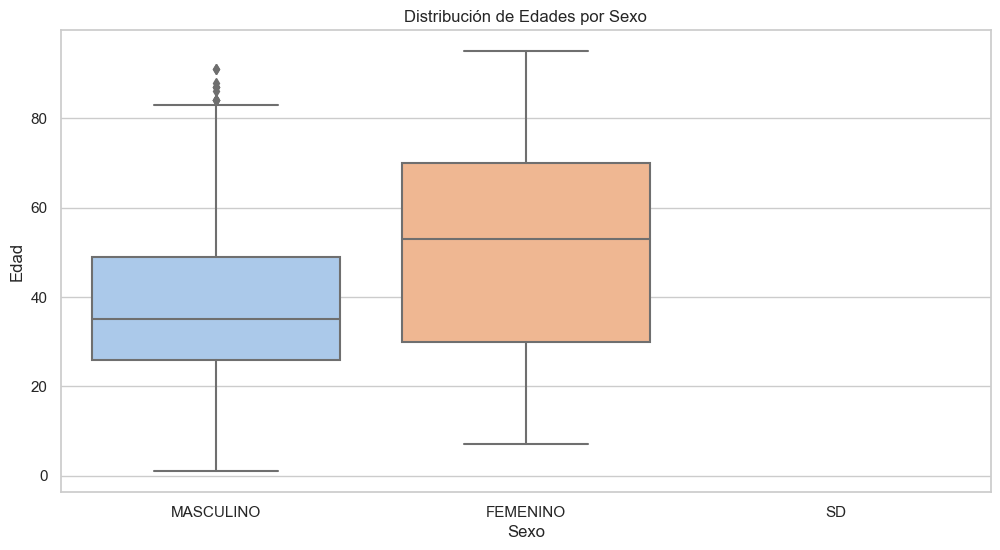

In [ ]:
# Análisis por sexo: Distribución de edades por sexo con diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='SEXO', y='EDAD', data=victimas_df, palette='pastel')
plt.title('Distribución de Edades por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()


En el boxplot que representa las edades de las víctimas discriminadas por género
* Se observa para el sexo masculino que la media de edades se sitúa alrededor de los 36 años. Además, el rango intercuartílico (IQR), que abarca el 25% al 75% de los datos, se concentra entre los 26 y 50 años aproximadamente, evidenciando una distribución centrada en esa franja etaria.

* En contraste, para el sexo femenino, se aprecia una media de edad superior, alrededor de los 52 años. El rango intercuartílico (IQR) para este grupo abarca edades entre 30 y 70 años, indicando una mayor dispersión de las edades de las víctimas femeninas en comparación con el grupo masculino.

#### **Conclusiones**
* La prevalencia de fallecimientos en el género masculino subraya la necesidad de abordar específicamente las dinámicas de seguridad vial relacionadas con la conducción masculina, considerando posibles factores contribuyentes y diseñando estrategias preventivas dirigidas a este grupo demográfico.
* Estos hallazgos revelan diferencias significativas en las distribuciones de edades entre los géneros, proporcionando insights valiosos que pueden ser fundamentales para el diseño de intervenciones y políticas de seguridad vial específicas para cada grupo demográfico.

### **Victimas en función de la edad**

#### Edades de las victimas

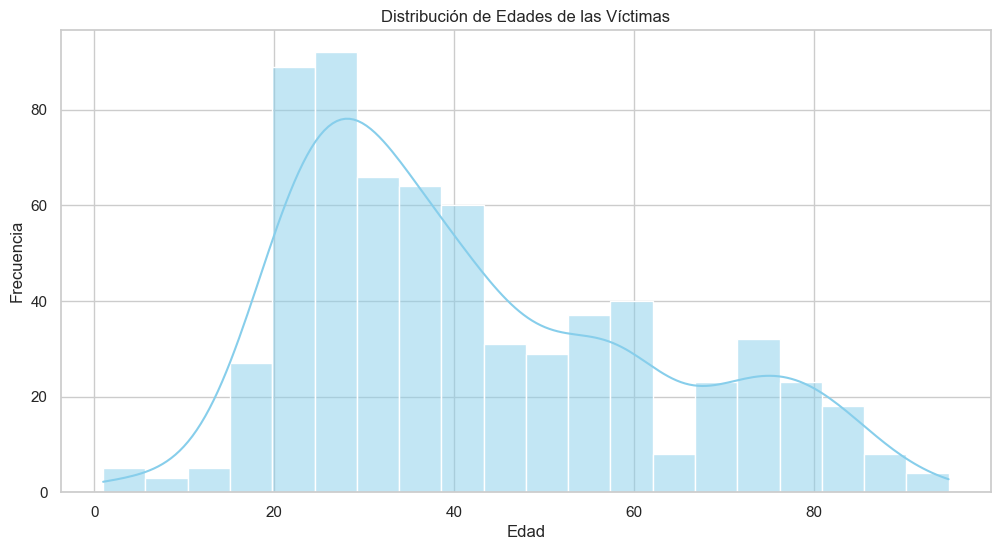

In [ ]:

# Histograma de edades
plt.figure(figsize=(12, 6))
sns.histplot(victimas_df['EDAD'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


En el análisis de las edades de las víctimas, destaca una asociación significativa con el grupo etario comprendido entre 20 y 30 años. Este rango de edades coincide con una etapa de la vida en la que muchas personas están aprendiendo a conducir, lo que puede aumentar la probabilidad de exposición a situaciones de riesgo. Además, se observa que en esta franja de edad, la precaución puede ser menor, posiblemente influenciada por la combinación de la novedad en la conducción y la sensación de juventud y vitalidad.

#### Edades por rol

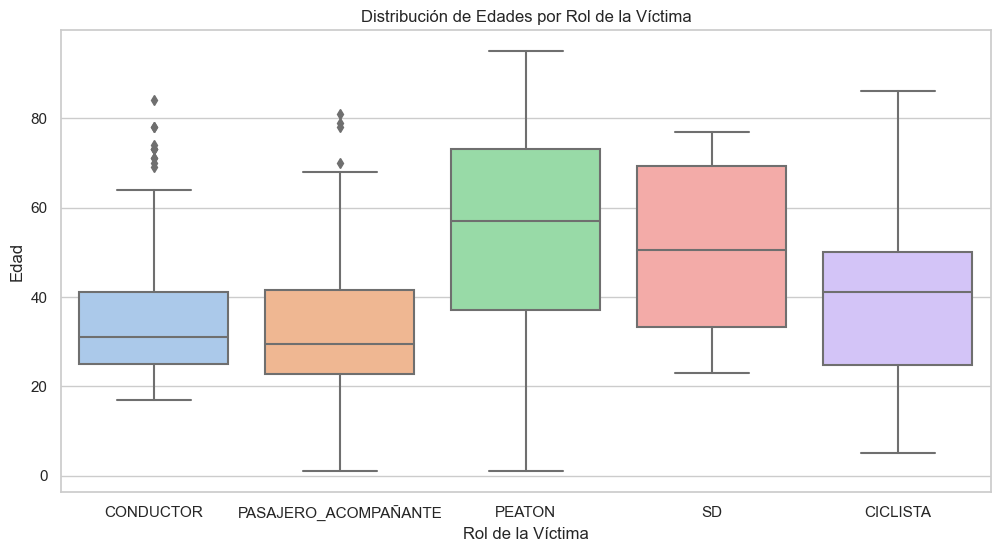

In [ ]:
# Diagrama de caja de edades por rol
plt.figure(figsize=(12, 6))
sns.boxplot(x='ROL', y='EDAD', data=victimas_df, palette='pastel')
plt.title('Distribución de Edades por Rol de la Víctima')
plt.xlabel('Rol de la Víctima')
plt.ylabel('Edad')
plt.show()


En el análisis de las edades según el rol desempeñado en los incidentes, se observa que:
* Los pasajeros y acompañantes tienden a concentrarse mayoritariamente en el rango de edades aproximado de 20 a 40 años. Este patrón puede sugerir que la población más joven o en la etapa adulta temprana es más activa como ocupante de vehículos.

* En el caso de los peatones, se destaca un grupo de edades entre 40 y 70 años aproximadamente. Este hallazgo puede asociarse al hecho de que las personas mayores tienden a caminar más, pero también puede indicar que están más expuestas a situaciones de riesgo al cruzar las calles debido a posibles despistes.

* En cuanto a los ciclistas, se observa una concentración de edades entre 25 y 50 años. Este rango podría relacionarse con la preferencia de las personas en estas edades por el uso de la bicicleta, ya que están en una fase de la vida en la que son activas y saludables. Además, la observación sobre la falta de respeto a los ciclistas en entornos urbanos destaca la importancia de abogar por una mayor conciencia y respeto hacia estos vehículos más pequeños.

#### **Conclusiones**
* La importancia de implementar medidas educativas y de concientización dirigidas específicamente a los jóvenes conductores, enfocándose en promover hábitos de conducción seguros y la adopción de precauciones adecuadas.
* El análisis de ciertos grupos demográficos pueden proporcionar valiosos insights para diseñar estrategias de prevención que aborden de manera efectiva los desafíos asociados con la seguridad vial en cada segmento de la población.
* El análisis diferenciado por roles proporciona información valiosa para diseñar estrategias de seguridad vial específicas, adaptadas a las características y comportamientos asociados a cada grupo de usuarios de la vía.

### **Tendencias por edad**

C:\Users\USER\AppData\Local\Temp\ipykernel_14096\1304145174.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='FECHA', y='EDAD', data=victimas_df, estimator='mean', ci=None, color='skyblue')


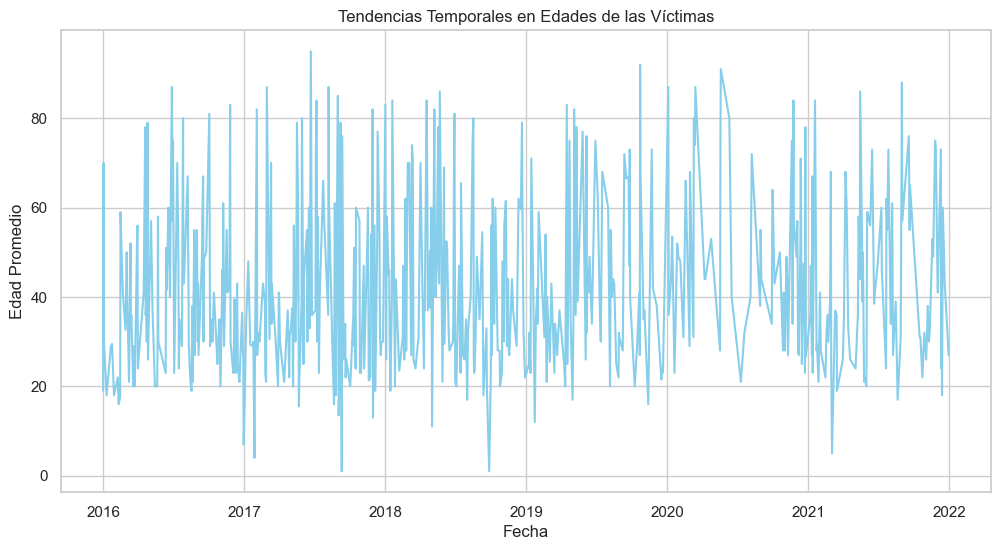

In [ ]:
# Supongamos que hay una columna 'FECHA' que representa la fecha del siniestro
victimas_df['FECHA'] = pd.to_datetime(victimas_df['FECHA'], errors='coerce')

# Gráfico de líneas de edades a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='FECHA', y='EDAD', data=victimas_df, estimator='mean', ci=None, color='skyblue')
plt.title('Tendencias Temporales en Edades de las Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Edad Promedio')
plt.show()


No se encuentran patrones de tendencias temporales asociados a la edad

### **Homicidios por tipo de arteria**

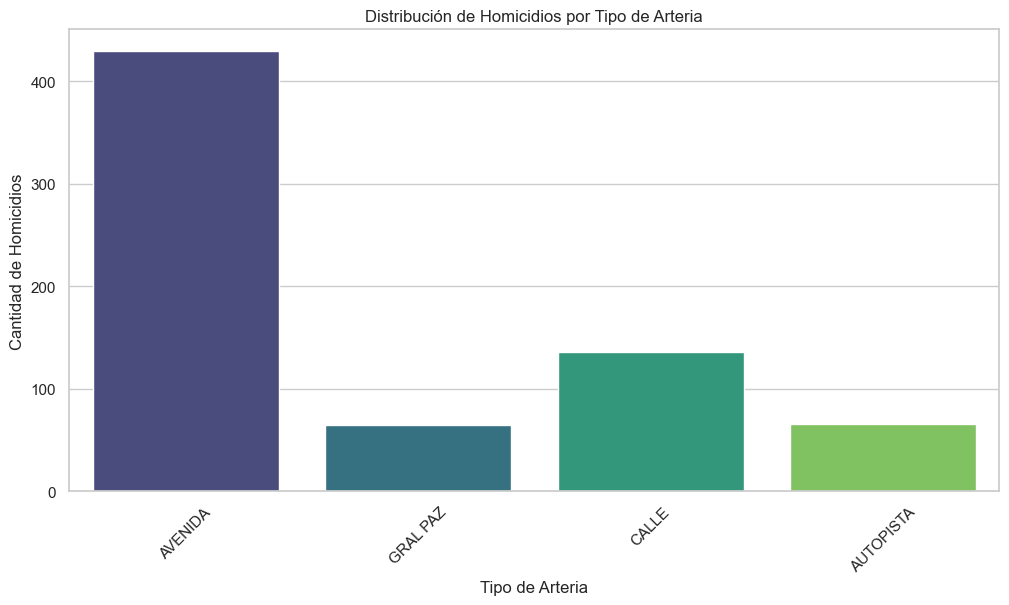

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras de distribución de homicidios por tipo de arteria
plt.figure(figsize=(12, 6))
sns.countplot(x='TIPO_DE_CALLE', data=homicidiosbsas, palette='viridis')
plt.title('Distribución de Homicidios por Tipo de Arteria')
plt.xlabel('Tipo de Arteria')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45)
plt.show()


En el análisis de homicidios según el tipo de arteria, se destaca que las avenidas son la categoría con mayor número de muertes. Esta observación puede atribuirse a la mayor afluencia de personas y vehículos en las avenidas, que a menudo sirven como vías principales para diversos tipos de transporte, incluyendo automóviles, bicicletas y peatones. La congestión y la diversidad de usuarios en las avenidas pueden contribuir a un entorno más caótico, aumentando así la probabilidad de accidentes y, en consecuencia, de homicidios viales.

### **Guardado de csv**
Guardo el csv con las modificaciones hechas durante el análisis

In [ ]:
# Guarda cada DataFrame en un archivo CSV
homicidiosbsas.to_csv('homicidiosbsas.csv', index=False)
victimas_df.to_csv('victimas.csv', index=False)
